# Cleaning up wage_offer_from

wage offer from is represented in two columns wage_offer_from_9089 and wage_offered_from_9089. These both columns must be merged in order to work with them.

In [91]:
import pandas as pd
import importlib
import modules
import numpy as np

In [92]:
col_list= ["wage_offer_from_9089", "wage_offered_from_9089"]
visas_df = pd.read_csv("data/us_perm_visas.csv", usecols=col_list)
visas_df.head ()

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (148) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,wage_offer_from_9089,wage_offered_from_9089
0,75629,NaN
1,37024,NaN
2,47923,NaN
3,10.97,NaN
4,100000,NaN


In [93]:
visas_df.dtypes

wage_offer_from_9089       object
wage_offered_from_9089    float64
dtype: object

wage_offered_from_9089 was sucessfully imported as float. 
However we'll have to take a closer look at wage_offer_from_9089 to convert it to a float value.

Next, we'll take a closer look how the values in these two columns are distributed. 
We defined a new function in our modules library to deal with this task. 

wage_offer_from_9089
259591/374362 69%
Filled: |██████████████████████████████████----------------| 69.3% Rows


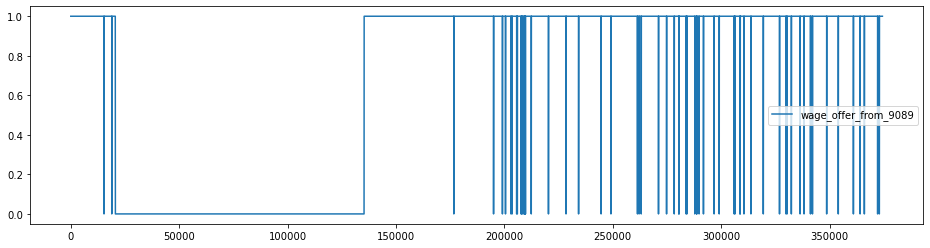


wage_offered_from_9089
114647/374362 31%
Filled: |███████████████-----------------------------------| 30.6% Rows


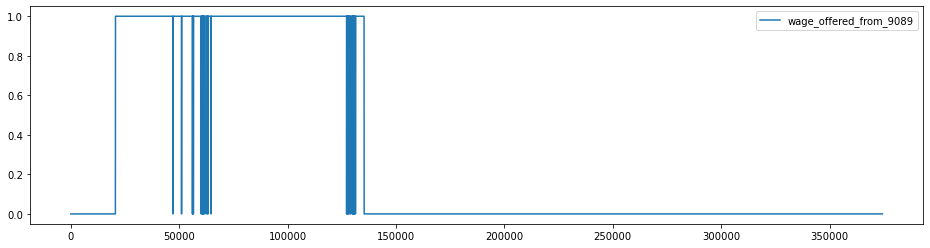

In [94]:
modules.print_count_of_values_relation(visas_df, True, True)

To explain the resulting graphs: 
The X-Axis shows the index of all values. We have over 350000 values (rows) in our dataset.
The Y-Axis shows if a row is filled with a actual value. Not NaN Values are displayed as 1, NaN values are displayed as 0. 

It becomes aparent that both columnscomplete each other. Gaps in wage_offer_from_9098 can be filled with wage_offer_from_9098.

----
## Cleaning up `wage_offer_from_9089`

In Progress of our data analysis it became apparent, that wage_offer_from_9089 has to be cleaned up, before analyzing the contained data. 

In [95]:
cleanup_df = visas_df.copy()
cleanup_df.dtypes

wage_offer_from_9089       object
wage_offered_from_9089    float64
dtype: object

Originally all the imported rows were recognized as "object". But the values should be converted to float values.

In [96]:
# cleanup_df["wage_offer_from_9089"].astype('float')

First, we tried to convert the data, by applying the new type.

In [97]:
cleanup_df["wage_offer_from_9089"].apply(type)

0         <class 'float'>
1         <class 'float'>
2         <class 'float'>
3         <class 'float'>
4         <class 'float'>
               ...       
374357      <class 'str'>
374358      <class 'str'>
374359      <class 'str'>
374360      <class 'str'>
374361      <class 'str'>
Name: wage_offer_from_9089, Length: 374362, dtype: object

We defined a new columnn, containing the types of all newly converted values.

In [98]:
cleanup_df['wage_Type'] = cleanup_df["wage_offer_from_9089"].apply(lambda x: type(x).__name__)

In [99]:

cleanup_df.head()

,wage_offer_from_9089,wage_offered_from_9089,wage_Type
0,75629,NaN,float
1,37024,NaN,float
2,47923,NaN,float
3,10.97,NaN,float
4,100000,NaN,float


In [100]:
import modules

In [101]:
importlib.reload(modules)
modules.print_full(cleanup_df.sample(100))

       wage_offer_from_9089  wage_offered_from_9089 wage_Type
313030               130000                     NaN     float
184690           112,000.00                     NaN       str
273655                39250                     NaN     float
255202               110583                     NaN     float
254932                42120                     NaN     float
134602                  NaN                84906.00     float
248246                87963                     NaN     float
228664                76378                     NaN     float
74927                   NaN                89440.00     float
220388            80,000.00                     NaN       str
284819               131269                     NaN     float
9727                  68661                     NaN     float
143352            89,502.00                     NaN       str
148019            43,100.00                     NaN       str
194101           142,501.00                     NaN       str
59052   

It became apparent, that apllying the new type was partially successful. But values containing delimiters or seperators are still recognized as a string. 

In [102]:

cleanup_df['wage_Type'].value_counts()

float    258181
str      116181
Name: wage_Type, dtype: int64

We defined a new function to remove the delimiters. Additionally we replaced the '#############' values, which occured two times, with NaN. 

In [103]:
def clean_currency(x):
    """ If the value is a string, then remove delimiters
    otherwise, the value is numeric and can be converted.

    """
    if isinstance(x, str):
        if x == '#############':
            x = np.nan
        else:
            return(x.replace(',', ''))
    return(x)

In [104]:
cleanup_df["wage_offer_from_9089"] = cleanup_df["wage_offer_from_9089"].apply(clean_currency).astype('float')
cleanup_df['wage_Type'] = cleanup_df["wage_offer_from_9089"].apply(lambda x: type(x).__name__)

In [105]:

cleanup_df['wage_Type'].value_counts()

float    374362
Name: wage_Type, dtype: int64

In [106]:

modules.print_full(cleanup_df.sample(100))

        wage_offer_from_9089  wage_offered_from_9089 wage_Type
26869                    NaN                45656.00     float
214357              95000.00                     NaN     float
10332               82514.00                     NaN     float
205718              76378.00                     NaN     float
170575             174450.00                     NaN     float
103248                   NaN               100000.00     float
362673              89500.00                     NaN     float
30015                    NaN                80538.00     float
123222                   NaN               150000.00     float
311287             103626.00                     NaN     float
59632                    NaN                86000.16     float
153416             142000.00                     NaN     float
272000             160000.00                     NaN     float
127222                   NaN                43514.00     float
344578             115304.00                     NaN   

Perfect, all values are now converted to float. The column `wage_offer_from_9089` was successfully cleaned up.

In [107]:
cleanup_df['wage_offer_from_9089'].median()

91104.0

In [108]:
visas_df['wage_offer_from_9089'] = cleanup_df['wage_offer_from_9089']
del cleanup_df

In [109]:
visas_df.sample(15)

,wage_offer_from_9089,wage_offered_from_9089
195291,111717.00,NaN
303434,66144.00,NaN
51888,NaN,83637.0
104745,NaN,88670.0
340752,82000.00,NaN
15219,94000.00,NaN
225827,97219.00,NaN
186321,98927.00,NaN
164398,91083.00,NaN
85611,NaN,81000.0


## Merging both columns

All NaN values wil lbe filled with 0 in order to sum both columns up.
We saw earlier thar both columns never overlap.

In [110]:
visas_df['wage_offer_merged'] = visas_df['wage_offer_from_9089'].fillna(0) + visas_df['wage_offered_from_9089'].fillna(0)

In [111]:
visas_df.sample(15)

,wage_offer_from_9089,wage_offered_from_9089,wage_offer_merged
74103,NaN,115000.0,115000.0
229152,7.7,NaN,7.7
115228,NaN,200000.0,200000.0
112077,NaN,100984.0,100984.0
167861,96845.0,NaN,96845.0
267868,60195.0,NaN,60195.0
352748,91250.0,NaN,91250.0
239754,100000.0,NaN,100000.0
110591,NaN,75442.0,75442.0
228680,120000.0,NaN,120000.0


In [112]:
visas_df['wage_offer_merged'].dtype

dtype('float64')

In [113]:
(visas_df['wage_offer_merged'] == 0).sum()

126

We filled NaN values with 0 in Order to calculate sums. Now we will replaye 0 with NaN to keep the columns cleaned up.
Additionally a wage of 0 would be unrealistic.

In [114]:
visas_df['wage_offer_merged'].replace(0, np.nan, inplace=True)

In [115]:
(visas_df['wage_offer_merged'] == 0).sum()

0

In [116]:
visas_df['wage_offer_merged'].median()

91000.0

---
# Cleaning up wage_offer_unit

In [117]:
col_list= ["wage_offer_unit_of_pay_9089", "wage_offered_unit_of_pay_9089"]
visas_df = pd.read_csv("data/us_perm_visas.csv", usecols=col_list)
visas_df.head ()

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,wage_offer_unit_of_pay_9089,wage_offered_unit_of_pay_9089
0,yr,NaN
1,yr,NaN
2,yr,NaN
3,hr,NaN
4,yr,NaN


In [118]:
visas_df.sample(50)

,wage_offer_unit_of_pay_9089,wage_offered_unit_of_pay_9089
209956,Year,NaN
272684,Year,NaN
125108,NaN,Year
15940,yr,NaN
64367,NaN,NaN
51456,NaN,NaN
93591,NaN,Year
1696,yr,NaN
208118,Year,NaN
355606,Hour,NaN


In [129]:
visas_df['wage_offer_unit_of_pay_9089'].value_counts()

Year         230591
yr            19733
Hour           7038
hr              781
Week            142
Month            81
wk               30
mth              21
Bi-Weekly        20
bi                9
Name: wage_offer_unit_of_pay_9089, dtype: int64

In [130]:
visas_df['wage_offered_unit_of_pay_9089'].value_counts()

Year         68950
Hour          1651
Week            58
Month           39
Bi-Weekly        1
Name: wage_offered_unit_of_pay_9089, dtype: int64

wage_offer_unit_of_pay_9089 has to be cleaned. We'll deal with this issue after the merge. 

modules.print_count_of_values_relation(visas_df, True, True)

We will merge the both columns and take a closer look at the values they are containing.

In [122]:
visas_df['wage_offer_unit_merged'] = visas_df['wage_offer_unit_of_pay_9089'].fillna('') + visas_df['wage_offered_unit_of_pay_9089'].fillna('')

In [134]:
visas_df['wage_offer_unit_merged'].replace('', np.nan, inplace=True)

In [135]:
visas_df['wage_offer_unit_merged'].value_counts()

Year         299541
yr            19733
Hour           8689
hr              781
Week            200
Month           120
wk               30
mth              21
Bi-Weekly        21
bi                9
Name: wage_offer_unit_merged, dtype: int64